<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Arboles de Decisión </h2> 

---

# AspectosTeóricos

## Introducción

Los **árboles de decisión** son algoritmos de aprendizaje supervisados, usados para resolver problemas de clasifición y regresión. Su nombre viene de la estructura que se asemeja a la de un árbol y sus partes tambien hacen referencia a las partes de un árbol. Estos modelos son relativamente simples, pero poderosos para modelar relaciones no lineales. Al ser un modelo no paramétrico, el objetivo de este algoritmo es aprender a predecir los resultados basandose en reglas de decisión simple, del tipo *if-else*.

## Ejemplo de un Árbol de Decisión

Supongamos que tenemos un dataset hipotético de modelos de vehiculos de diferentes fábricas, de los cuales sse dispone las siguientes características: **Capacidad de combustible, motor, precio, años de compra, kilometros recorridos y kilometros por litro.**  Con esta data queremos crear un modelo que pueda predecir el rendimiento en kilometros por litro de un vehiculo.

El arbol de decisión para este ejemplo es el siguiente:

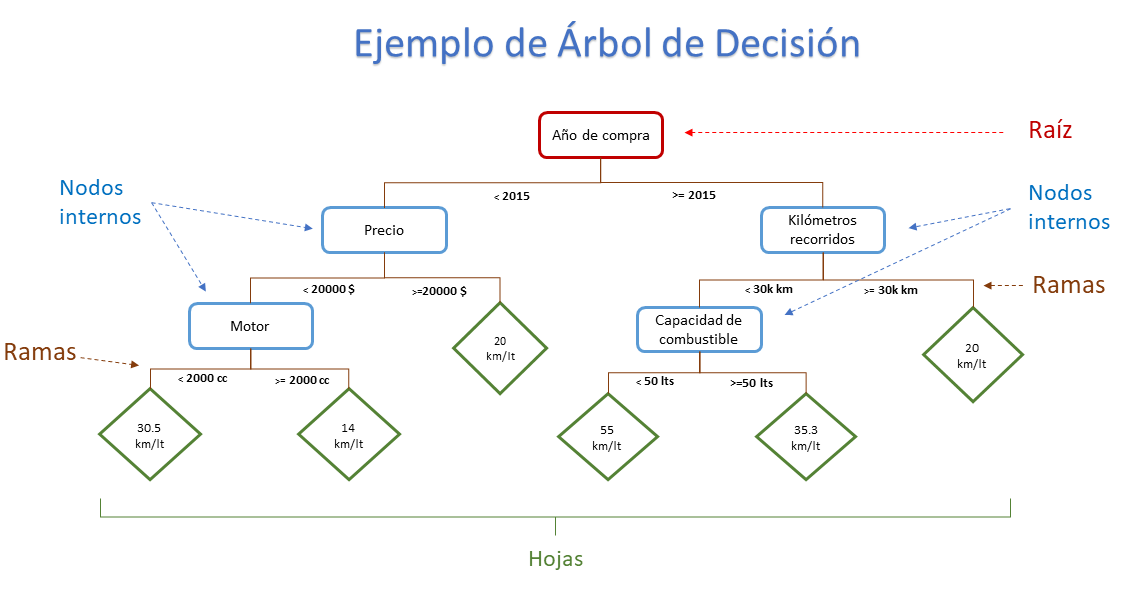

## Estructura

En la imagen anterior podemos apreciar la estructura general de un árbol de decisión, el cual está formado por un nodo principal o **raiz**, desde donde comenzamos la clasificación de acuerdo a los criterios de decisión establecidos en las **ramas**. Estas ramas nos conducen a otros nodos donde se repite el proceso, pasando por diferentes **nodos internos** y desde estos al final llegar a las **hojas** que será nuestra clasificación final.

## División de nodos

Los árboles de decisión trabajan de manera descendente y la división de nodos es un concepto importante para cualquier algoritmo de árboles de decisión. La mayoría de los algorítmos tienen un enfoque codicioso a la hora de dividir el espacio de entrada en subconjuntos.

El proceso más básico en términos simples es probar y dividir los datos usando diferentes atributos y funciones de costo. En cada paso se selecciona la división que ressulta menos costosa. Los problemas de clasificación y regresión utilizan diferentes funciones de costos. Algunas de estas se mencionan a continuación:

* **Error Cuadrático Medio**: Es usada principalmente para árboles de regresión, esta calcula el cuadrado de las diferencias entre el valor observado y predicho.

* **Error Absoluto Medio**: Es usada para árboles de regresión, es similar al error cuadrático medio, solo que usa la diferencia en valor absoluto. 

* **Reducción de Varianza**:  Este fue el primero que se introdujo con el algoritmo CART. Se usa la fórmula estándar de la varianza y se selecciona aquel resultado que minimiza la varianza.

* **Impureza de Gini**: Es usado principalmente en clasificación, esta medida viene dada por:
 $$\displaystyle\mbox{Gini(t)} = 1-\sum_{i=0}^{c-1}[p(i/t)]^2$$


* **Ganancia de información**: Es utilizado en árboles de clasificación, en este caso la partición busca aumentar la pureza respecto al nodo padre. Los criterios usado para medir la impureza son los siguientes:

* $\displaystyle\mbox{Entropia(t)} = -\sum_{i=0}^{c-1}p(i/t)log_{2}(p(i/t))$

* $\displaystyle\mbox{Gini(t)} = 1-\sum_{i=0}^{c-1}[p(i/t)]^2$

* $\displaystyle \mbox{Error de clasificacion(t)} = 1 - \max_{i}[p(i/t)]$

## Criterios para detener una partición

Existen diferentes criterios para evitar que un árbol crezca hasta alcanzar demasiada complejidad, algunos de estos criterios son:

* **Prepoda**: Consiste en definir un umbral para la Ganancia de Información y si, en un nodo determinado, ninguna de las particiones proporciona una ganancia mayor al umbral, se para el desarrollo de subárboles en dicho nodo. es facil de implementar, sin embargo tiene la desventaja que no se conoce a priori el umbral óptimo.

* **Poda**: Consiste en desarrollar el árbol completo hasta tener particiones completamente puras y a partir de allí comenzar a eliminar ramas del árbol usando algún criterio. Los dos criterios más utilizados son:
    * Reemplazar subárboles por hojas si estos no proporcionan una ganacia suficiente de información.
    * Reemplazar subárboles por árboles más simples.

## Algoritmos de árboles de Decisión

Algunos de los algoritmos más comunes usados en la actualidad son los siguientes:

* CART o Classification And Regression Tree
* ID3 o Iterative Dichotomizer 3.
* C4.5

## Práctica

In [1]:
from sklearn import datasets, metrics
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Importamos el dataset

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

## Escalamos los datos

In [4]:
sc =StandardScaler()
sc.fit(X)
X = sc.transform(X)

### Separamos el dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Creamos el modelo y entrenamos

In [6]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Generamos métricas para evaluar el modelo

### Fase de entrenamiento

In [18]:
print("Entrenamiento - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))

Entrenamiento - Accuracy : 1.0


In [21]:
print("Entrenamiento - Matriz de Confusión :\n",metrics.confusion_matrix(y_train, clf.predict(X_train)))

Entrenamiento - Matriz de Confusión :
 [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]


In [25]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_train, clf.predict(X_train)))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



### Fase de validación

In [26]:
print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Test - Matriz de Confusión :\n",metrics.confusion_matrix(y_test, clf.predict(X_test)))
print("Test - Reporte de clasificación :\n", metrics.classification_report(y_test, clf.predict(X_test)))

Test - Accuracy : 0.9777777777777777
Test - Matriz de Confusión :
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - Reporte de clasificación :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [32]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from matplotlib import pyplot as plt

array([0, 1, 2])

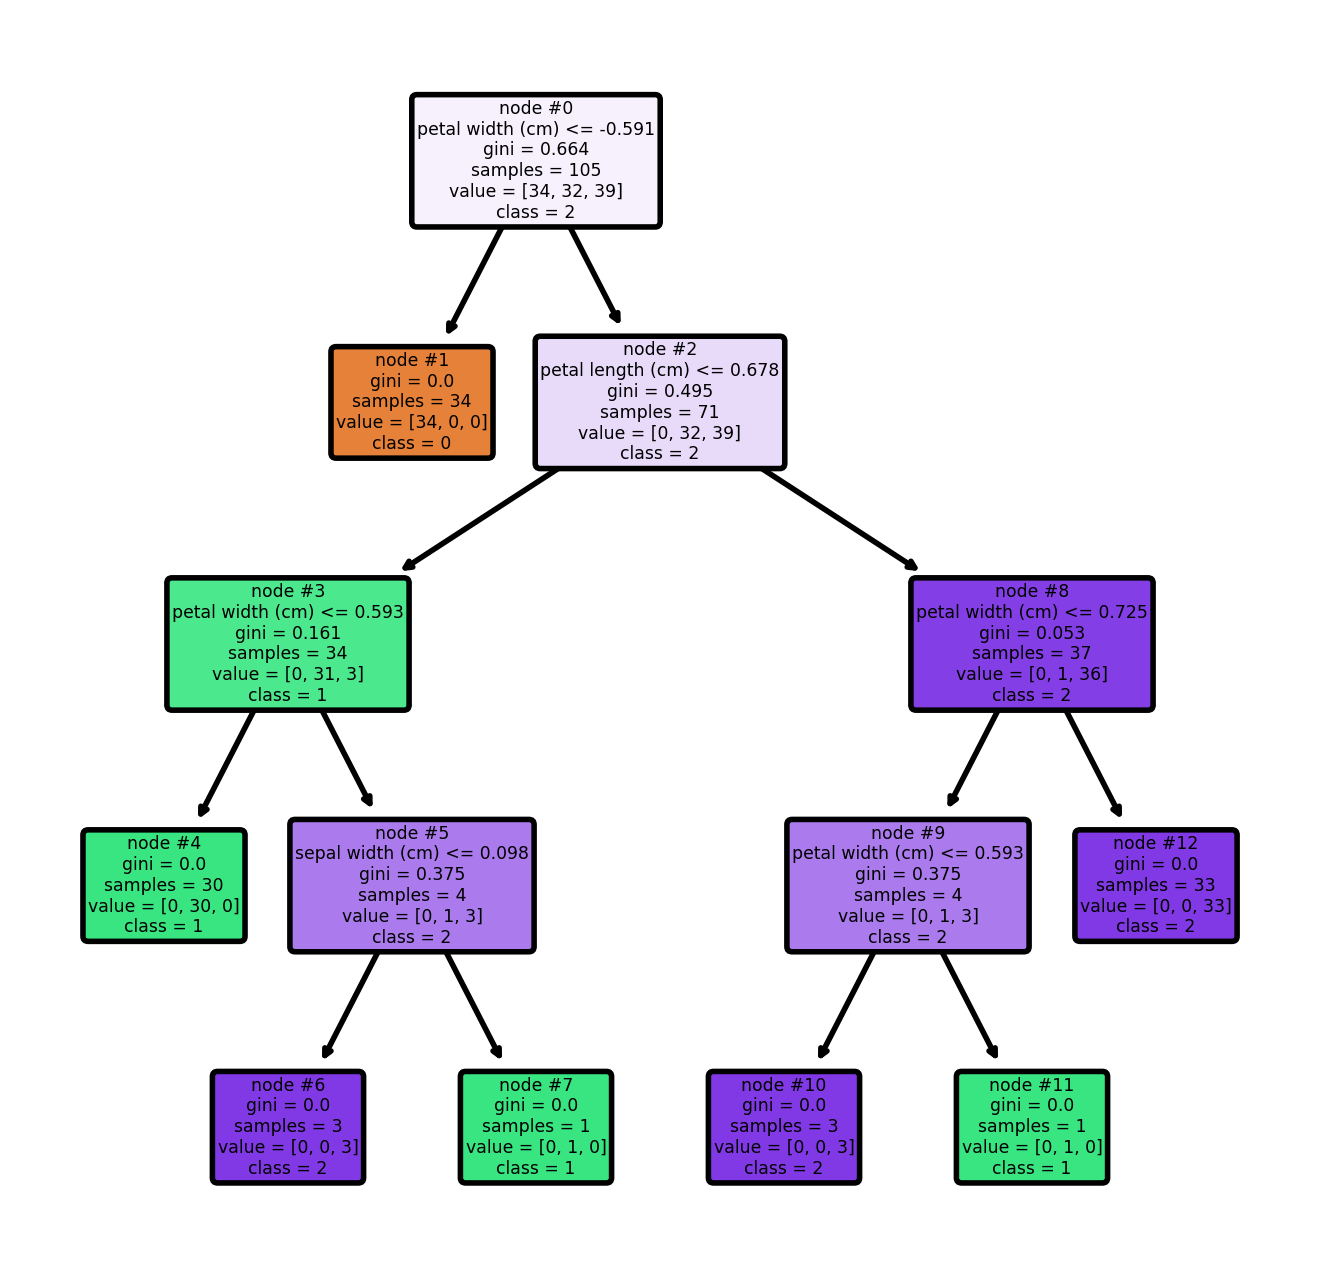

In [50]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
tree.plot_tree(clf, max_depth=5,filled=True,feature_names=iris.feature_names, class_names = clf.classes_.astype(int).astype(str), rounded=True, node_ids=1)
fig.savefig('arbol.png')